<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Preprocesamiento de Datos
## Tarea 4 
## Normalización y estándarización

In [1]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=1f4a9808927b29b876e170092807295968237ce121ded93588c3ae10c988b7f3
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
#Tratamiento de datos
#====================================
import pandas as pd
import numpy as np

#Graficos
#====================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocesado y análisis
#====================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

plt.style.use('ggplot')

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/RDLL/curso_mineria_de_datos/main/newhepatitis.csv')
df.head(n=10)

,Unnamed: 0,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,0,30,male,False,False,False,False,False,False,False,...,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,1,50,female,False,False,True,False,False,False,False,...,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,3,31,female,NaN,True,False,False,False,True,False,...,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
3,5,34,female,True,False,False,False,False,True,False,...,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
4,6,51,female,False,False,True,False,True,True,False,...,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
5,7,23,female,True,False,False,False,False,True,False,...,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
6,8,39,female,True,False,True,False,False,True,True,...,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
7,9,30,female,True,False,False,False,False,True,False,...,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live
8,10,39,female,False,True,False,False,False,False,True,...,False,False,False,1.30,78.0,30.000000,4.400000,85.0,False,live
9,12,41,female,True,True,True,False,False,True,True,...,False,False,False,0.90,81.0,60.000000,3.900000,52.0,False,live


In [91]:
columnas=["age", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]
datos = df[columnas].copy()
datos = datos.fillna(100)

datos.head(n=10)
#Llenamos los nulos de protime con su moda que es 100, esto para evitar NaN en el calculo de los valores Z, al calcular la moda y hacer uso de fillna no los llena todos

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.00,85.0,18.000000,4.000000,100.0
1,50,0.90,135.0,42.000000,3.500000,100.0
2,31,0.70,46.0,52.000000,4.000000,80.0
3,34,0.90,95.0,28.000000,4.000000,75.0
4,51,0.95,91.6,34.666667,4.133333,77.0
5,23,1.00,88.2,41.333333,4.266667,79.0
6,39,0.70,84.8,48.000000,4.400000,81.0
7,30,1.00,81.4,120.000000,3.900000,83.0
8,39,1.30,78.0,30.000000,4.400000,85.0
9,41,0.90,81.0,60.000000,3.900000,52.0


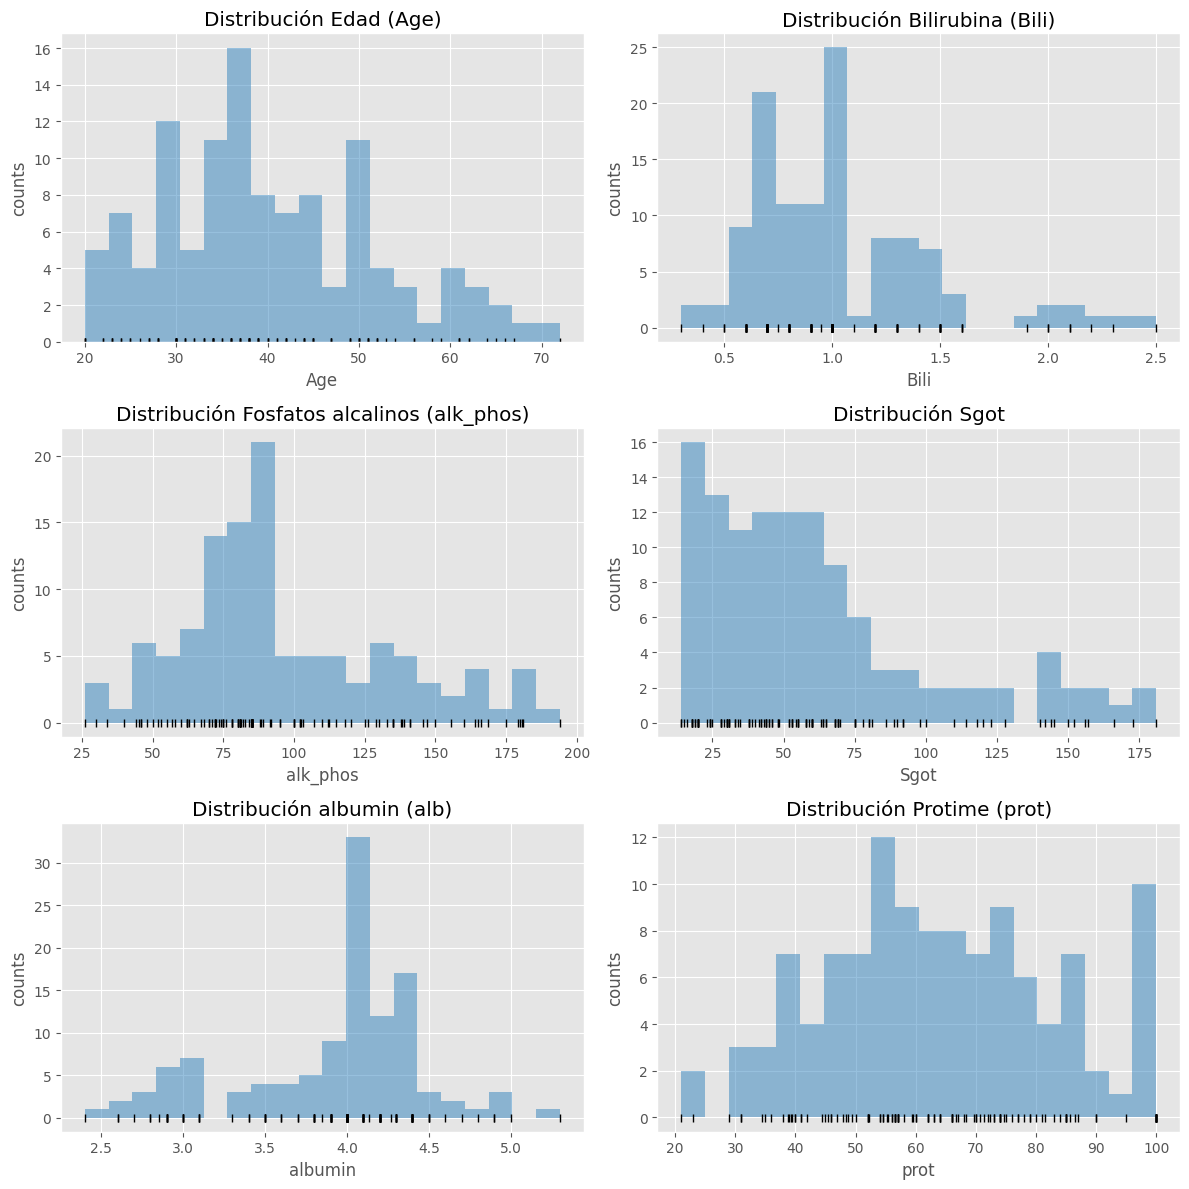

In [46]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axs[0][0].hist(x=datos.age, bins=20, color="#3182bd", alpha=0.5)
axs[0][0].plot(datos.age, np.full_like(datos.age, -0.01), '|k', markeredgewidth=1)
axs[0][0].set_title('Distribución Edad (Age)')
axs[0][0].set_xlabel('Age')
axs[0][0].set_ylabel('counts')

axs[0][1].hist(x=datos.bilirubin, bins=20, color="#3182bd", alpha=0.5)
axs[0][1].plot(datos.bilirubin, np.full_like(datos.bilirubin, -0.01), '|k', markeredgewidth=1)
axs[0][1].set_title('Distribución Bilirubina (Bili)')
axs[0][1].set_xlabel('Bili')
axs[0][1].set_ylabel('counts')

axs[1][0].hist(x=datos.alk_phosphate, bins=20, color="#3182bd", alpha=0.5)
axs[1][0].plot(datos.alk_phosphate, np.full_like(datos.alk_phosphate, -0.01), '|k', markeredgewidth=1)
axs[1][0].set_title('Distribución Fosfatos alcalinos (alk_phos)')
axs[1][0].set_xlabel('alk_phos')
axs[1][0].set_ylabel('counts')

axs[1][1].hist(x=datos.sgot, bins=20, color="#3182bd", alpha=0.5)
axs[1][1].plot(datos.sgot, np.full_like(datos.sgot, -0.01), '|k', markeredgewidth=1)
axs[1][1].set_title('Distribución Sgot')
axs[1][1].set_xlabel('Sgot')
axs[1][1].set_ylabel('counts')

axs[2][0].hist(x=datos.albumin, bins=20, color="#3182bd", alpha=0.5)
axs[2][0].plot(datos.albumin, np.full_like(datos.albumin, -0.01), '|k', markeredgewidth=1)
axs[2][0].set_title('Distribución albumin (alb)')
axs[2][0].set_xlabel('albumin')
axs[2][0].set_ylabel('counts')

axs[2][1].hist(x=datos.protime, bins=20, color="#3182bd", alpha=0.5)
axs[2][1].plot(datos.protime, np.full_like(datos.protime, -0.01), '|k', markeredgewidth=1)
axs[2][1].set_title('Distribución Protime (prot)')
axs[2][1].set_xlabel('prot')
axs[2][1].set_ylabel('counts')

plt.tight_layout();

In [109]:
X = {} #media
S = {} #desviacion estandar
for c in columnas:
  X[c] = df[c].mean()
  S[c] = df[c].std()
  print("Media: ",X[c],"\nDesviación estandar:",S[c])

Media:  40.025862068965516 
Desviación estandar: 11.8207343308248
Media:  1.0275862068965518 
Desviación estandar: 0.4147993138429929
Media:  95.79094827586206 
Desviación estandar: 37.48359559984812
Media:  61.35344827586207 
Desviación estandar: 40.21704493099714
Media:  3.9025862068965527 
Desviación estandar: 0.5613114537040053
Media:  64.06695906432748 
Desviación estandar: 19.436214789445902


In [126]:
z = {}
dfz = datos.copy()
for c in columnas:
  Z = []
  for i in range(datos.shape[0]):
    xi=datos.iloc[i][c]
    Z.append(abs((xi -X[c])/S[c]))
  z[c] = Z

{'age': [0.8481589881282743, 0.8437832753778277, 0.7635618749529692, 0.5097705354270539, 0.9283803885531328, 1.44033878035541, 0.0867849695505284, 0.8481589881282743, 0.0867849695505284, 0.08240925680008179, 0.8481589881282743, 0.5899919358519123, 0.1713820827258335, 2.197337086182709, 0.002187856375223304, 0.1713820827258335, 0.1713820827258335, 1.5249358935307151, 1.1019503276541895, 0.7635618749529692, 0.1670063699753869, 1.2711445540047999, 1.1019503276541895, 0.7591861622025226, 1.5205601807802684, 1.7743515203061837, 0.9283803885531328, 1.8589486334814889, 0.08240925680008179, 1.1865474408294947, 0.4251734222517488, 0.2559791959011386, 1.44033878035541, 1.6941301198813252, 0.1670063699753869, 2.1127399730074043, 1.012977501728438, 0.594367648602359, 1.3513659544296583, 0.5097705354270539, 1.0173532144788844, 0.2559791959011386, 0.3405763090764437, 0.1713820827258335, 0.0867849695505284, 0.0867849695505284, 0.3362005963259971, 0.002187856375223304, 0.8481589881282743, 0.2559791959

In [127]:
for c in columnas:
  print(z[c])

[0.8481589881282743, 0.8437832753778277, 0.7635618749529692, 0.5097705354270539, 0.9283803885531328, 1.44033878035541, 0.0867849695505284, 0.8481589881282743, 0.0867849695505284, 0.08240925680008179, 0.8481589881282743, 0.5899919358519123, 0.1713820827258335, 2.197337086182709, 0.002187856375223304, 0.1713820827258335, 0.1713820827258335, 1.5249358935307151, 1.1019503276541895, 0.7635618749529692, 0.1670063699753869, 1.2711445540047999, 1.1019503276541895, 0.7591861622025226, 1.5205601807802684, 1.7743515203061837, 0.9283803885531328, 1.8589486334814889, 0.08240925680008179, 1.1865474408294947, 0.4251734222517488, 0.2559791959011386, 1.44033878035541, 1.6941301198813252, 0.1670063699753869, 2.1127399730074043, 1.012977501728438, 0.594367648602359, 1.3513659544296583, 0.5097705354270539, 1.0173532144788844, 0.2559791959011386, 0.3405763090764437, 0.1713820827258335, 0.0867849695505284, 0.0867849695505284, 0.3362005963259971, 0.002187856375223304, 0.8481589881282743, 0.2559791959011386, 

In [130]:
zscore_df = stats.zscore(datos,axis=0)
print(zscore_df)

          age  bilirubin  alk_phosphate      sgot   albumin   protime
0   -0.851839  -0.066793      -0.289134 -1.082664  0.174300  1.788456
1    0.847444  -0.308920       1.050570 -0.483313 -0.720336  1.788456
2   -0.766875  -0.793173      -1.334103 -0.233583  0.174300  0.775554
3   -0.511982  -0.308920      -0.021193 -0.832934  0.174300  0.522329
4    0.932408  -0.187857      -0.112293 -0.666448  0.412869  0.623619
..        ...        ...            ...       ...       ...       ...
111 -0.342054  -1.035299       0.648659 -0.782988  0.174300 -0.997025
112  0.337659  -0.308920       0.809424  2.013983  0.711081 -0.777563
113  1.782049  -0.551046      -0.557074 -1.032718  0.353227 -0.811326
114  1.102336   1.143838      -0.396310 -1.057691  0.353227 -0.845089
115  0.252695   0.417459       0.112778 -1.057691 -1.436044 -1.148960

[116 rows x 6 columns]


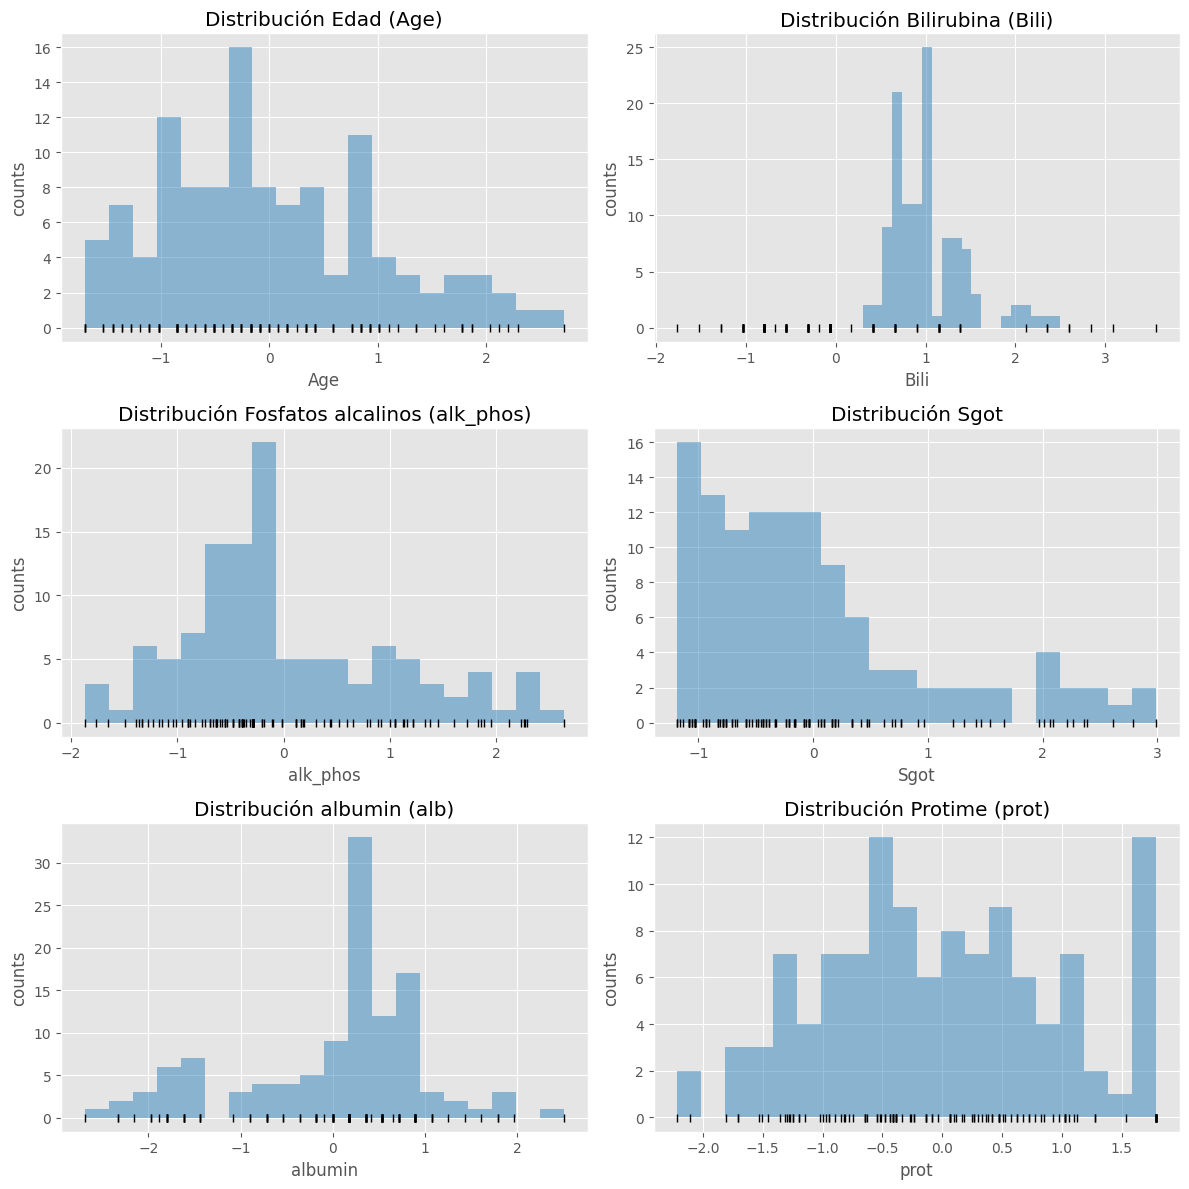

In [131]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axs[0][0].hist(x=zscore_df.age, bins=20, color="#3182bd", alpha=0.5)
axs[0][0].plot(zscore_df.age, np.full_like(zscore_df.age, -0.01), '|k', markeredgewidth=1)
axs[0][0].set_title('Distribución Edad (Age)')
axs[0][0].set_xlabel('Age')
axs[0][0].set_ylabel('counts')

axs[0][1].hist(x=datos.bilirubin, bins=20, color="#3182bd", alpha=0.5)
axs[0][1].plot(zscore_df.bilirubin, np.full_like(zscore_df.bilirubin, -0.01), '|k', markeredgewidth=1)
axs[0][1].set_title('Distribución Bilirubina (Bili)')
axs[0][1].set_xlabel('Bili')
axs[0][1].set_ylabel('counts')

axs[1][0].hist(x=zscore_df.alk_phosphate, bins=20, color="#3182bd", alpha=0.5)
axs[1][0].plot(zscore_df.alk_phosphate, np.full_like(zscore_df.alk_phosphate, -0.01), '|k', markeredgewidth=1)
axs[1][0].set_title('Distribución Fosfatos alcalinos (alk_phos)')
axs[1][0].set_xlabel('alk_phos')
axs[1][0].set_ylabel('counts')

axs[1][1].hist(x=zscore_df.sgot, bins=20, color="#3182bd", alpha=0.5)
axs[1][1].plot(zscore_df.sgot, np.full_like(zscore_df.sgot, -0.01), '|k', markeredgewidth=1)
axs[1][1].set_title('Distribución Sgot')
axs[1][1].set_xlabel('Sgot')
axs[1][1].set_ylabel('counts')

axs[2][0].hist(x=zscore_df.albumin, bins=20, color="#3182bd", alpha=0.5)
axs[2][0].plot(zscore_df.albumin, np.full_like(zscore_df.albumin, -0.01), '|k', markeredgewidth=1)
axs[2][0].set_title('Distribución albumin (alb)')
axs[2][0].set_xlabel('albumin')
axs[2][0].set_ylabel('counts')

axs[2][1].hist(x=zscore_df.protime, bins=20, color="#3182bd", alpha=0.5)
axs[2][1].plot(zscore_df.protime, np.full_like(zscore_df.protime, -0.01), '|k', markeredgewidth=1)
axs[2][1].set_title('Distribución Protime (prot)')
axs[2][1].set_xlabel('prot')
axs[2][1].set_ylabel('counts')

plt.tight_layout();